In [13]:
import pandas as pd
import numpy as np
import json

from app_store_scraper import AppStore
getgo = AppStore(country='sg', app_name='getgo', app_id = '1545316216')

getgo.review(how_many=2000)

2023-02-23 19:45:50,727 [INFO] Base - Initialised: AppStore('sg', 'getgo', 1545316216)
2023-02-23 19:45:50,728 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/sg/app/getgo/id1545316216
2023-02-23 19:45:52,329 [INFO] Base - [id:1545316216] Fetched 614 reviews (614 fetched in total)


In [14]:
getgo.reviews

[{'date': datetime.datetime(2021, 10, 29, 2, 42, 14),
  'developerResponse': {'id': 26048957,
   'body': "Hey Gracias, thank you for your review! We really appreciate your support and we are so glad you are enjoying our service. 😊 We will definitely take note of your feedback and take it into consideration as we continue to improve on our service! We can't wait to see you continue to enjoy the #FreedomToDrive with us. 🥰\n\nCheers, Natalie",
   'modified': '2021-11-03T06:03:49Z'},
  'review': 'Good point A to point A rental service with no membership fees! The app interface is very intuitive and easy to use although there are some issues connecting to the car to unlock them at times depending on the connection. \n\nAlso, because the rental return is based on the app, essential to make sure your phone as enough battery. The fleets are well maintained, clean and available at many convenient locations. Save $, Don’t need to buy car. :)\n\nSome areas to improve on will be the chat function 

In [15]:
getgodf = pd.DataFrame(np.array(getgo.reviews),columns=['review'])
getgodf2 = getgodf.join(pd.DataFrame(getgodf.pop('review').tolist()))
getgodf2.head()

,date,developerResponse,review,rating,isEdited,userName,title
0,2021-10-29 02:42:14,"{'id': 26048957, 'body': 'Hey Gracias, thank y...",Good point A to point A rental service with no...,4,False,Gracias.i.m,"Convenient rental service, Easy to use app int..."
1,2022-01-28 07:52:22,"{'id': 27222908, 'body': 'Hey Vishal, thanks f...",Today booked Ssangyong XLV with GetGo Carshari...,5,True,Vishal C B,Need to Access current Booking via Offline (To...
2,2021-12-04 02:47:08,"{'id': 26796019, 'body': 'Hey Lexus, thank you...",GetGO had a strong community at a certain plat...,5,False,Lexus Guo,it’s nothing but a PERFECT APP
3,2021-12-08 02:23:32,"{'id': 26796398, 'body': 'Hey gogetclean, than...",Hi i would like to reflect on the cleanliness ...,5,False,gogetclean,Responsibility of hirer.
4,2022-03-10 10:30:15,NaN,"I joined GetGo in February 2021, when they fir...",5,False,kelv99,"Easy to use app, fantastic customer service te..."


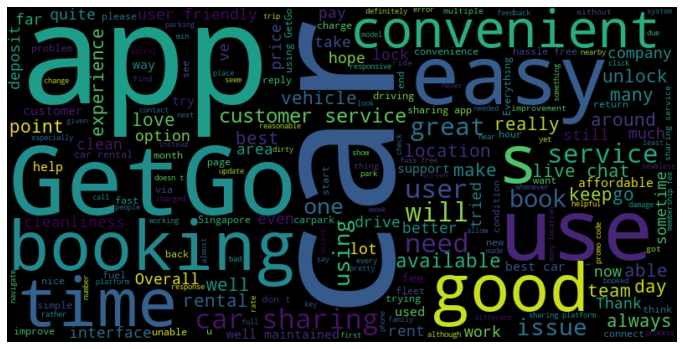

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


# create a word cloud from the review column
text = ' '.join(getgodf2['review'].astype(str))
wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [17]:
wordcloud.to_file('wordcloudreview.png')

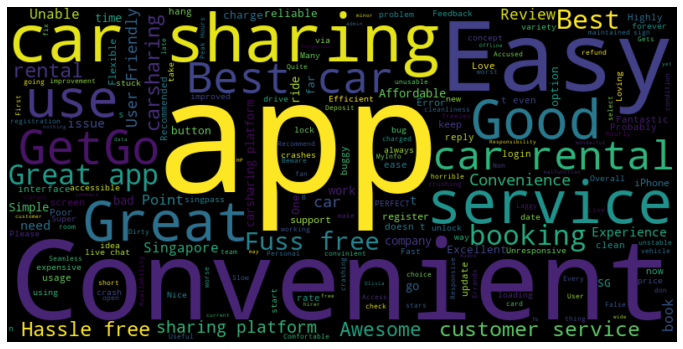

In [18]:
# create a word cloud from the review column
text = ' '.join(getgodf2['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
wordcloud.to_file('wordcloudtitle.png')

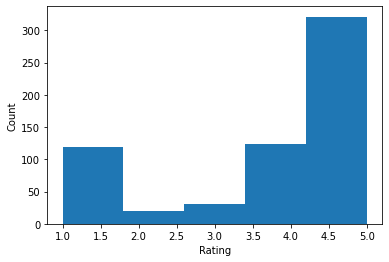

In [21]:

# create a histogram of the rating column
plt.hist(getgodf2['rating'], bins=5)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


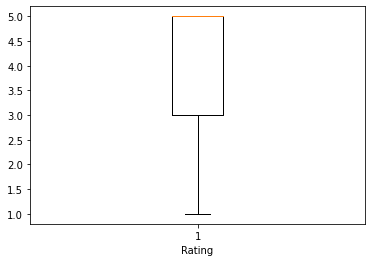

In [22]:


# create a box plot of the rating column
plt.boxplot(getgodf2['rating'])
plt.xlabel('Rating')
plt.show()

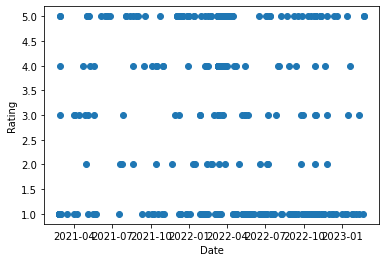

In [23]:


# convert the date column to a datetime format
getgodf2['date'] = pd.to_datetime(getgodf2['date'], format='%Y-%m-%d %H:%M:%S')

# create a scatter plot of rating vs date
plt.scatter(getgodf2['date'], getgodf2['rating'])
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()


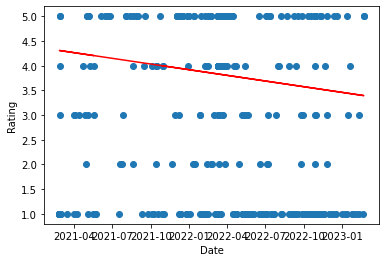

In [24]:
from scipy import stats

# create a scatter plot of rating vs date
plt.scatter(getgodf2['date'], getgodf2['rating'])

# add a linear trendline to the scatter plot
slope, intercept, r_value, p_value, std_err = stats.linregress(getgodf2['date'].astype(int), getgodf2['rating'])
line = slope*getgodf2['date'].astype(int) + intercept
plt.plot(getgodf2['date'], line, color='red')

plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()

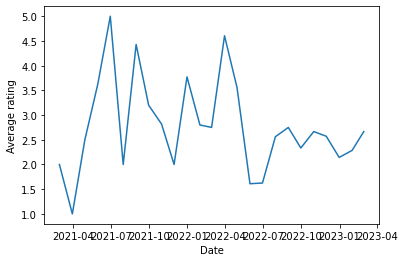

In [25]:

# group the data by month and calculate the mean rating
df_monthly = getgodf2.groupby(pd.Grouper(key='date', freq='M'))['rating'].mean().reset_index()

# create a line chart of the monthly average rating
plt.plot(df_monthly['date'], df_monthly['rating'])
plt.xlabel('Date')
plt.ylabel('Average rating')
plt.show()


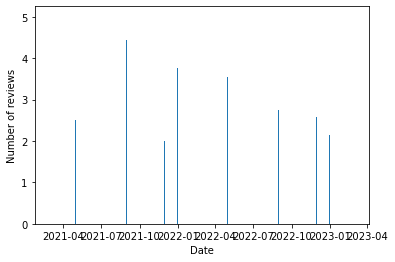

In [29]:


# create a bar chart of the number of ratings per month
plt.bar(df_monthly_2['date'], df_monthly['rating'])
plt.xlabel('Date')
plt.ylabel('Number of reviews')
plt.show()

In [38]:
# select the rows where the rating is 1
df_rating_1 = getgodf2[getgodf2['rating'] == 1]

for review in df_rating_1['review']:
    print(review)

I faced the exact same issue as a previous reviewer recently of being accused of causing damages to the car, even though I have absolute confidence that it was not caused by me as well. In fact, I only booked the car for an hour to travel nearby. Getgo’s ridiculous T&C states that if a user lodged a report regarding car damage, and if the previous user does not have photographic evidence to prove that it is not caused by him/her, they will be liable for the repair charges. The most suspicious thing was, throughout my entire email exchange with the staff, he did not even send me a pic of the alleged damages at all and yet kept requesting for photographic evidence from me. Will be making a police report regarding my case as well. Be warned about using GetGo as a car sharing option as you may face the same situation as me too.
If you are a thrill seeker and like surprises, you will like the GetGo rental cars service. If you are not a risk-taker, I would highly advise you not to use this a

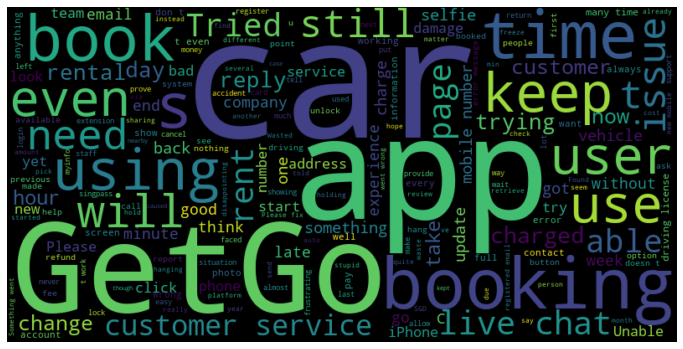

In [35]:
# create a word cloud from the review column
text = ' '.join(df_rating_1['review'].astype(str))
wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [43]:
wordcloud.to_file('wordcloudrating1.png')

In [42]:
from statsmodels.tsa.arima.model import ARIMA


# group the reviews by date to get the number of reviews per month
df_monthly_arima = getgodf2.groupby(pd.Grouper(key='date', freq='M')).size().reset_index(name='count')

# fit an ARIMA model to the number of reviews per month
model = ARIMA(df_monthly_arima['count'], order=(1,1,1))
model_fit = model.fit()

# use the model to make a one-step forecast for the next month
forecast = model_fit.forecast()

# print the forecasted number of reviews for the next month
print(forecast)


25    23.883547
dtype: float64
